In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                self.errors_.append(errors)
            return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [25]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/' 
    'machine-learning-databases/iris/iris.data', header=None)

df[140:150]

,0,1,2,3,4
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


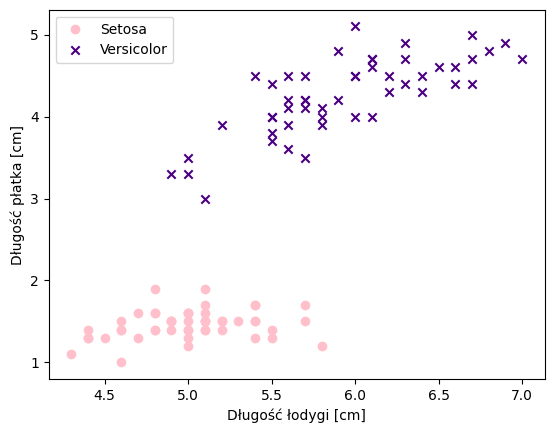

In [26]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50, 1],  color='pink', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='indigo', marker='x', label='Versicolor')
plt.xlabel('Długość łodygi [cm]')
plt.ylabel('Długość płatka [cm]')
plt.legend(loc='upper left')
plt.show()

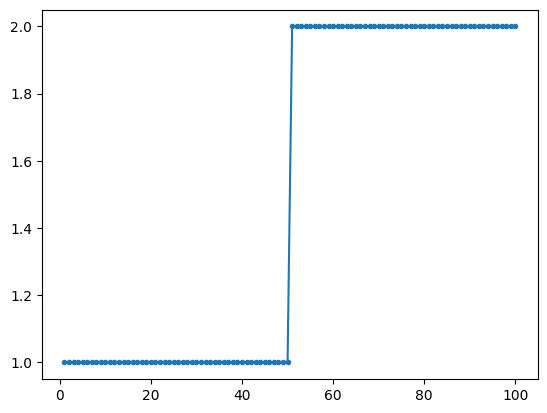

In [32]:
ppn = Perceptron(eta=0.1, n_iter=10) 
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='.')
plt.show()